In [1]:
import torch
torch.set_printoptions(sci_mode=False)
from dataset_classes.DEAM_CQT_sliding import DEAM_CQT_Dataset_Sliding
from dataset_classes.DEAM_CQT import *
from models.LSTM import LSTM_model
import numpy as np
import librosa
np.set_printoptions(suppress=True)

annot_path = "deam_dataset/DEAM_Annotations/annotations/annotations averaged per song/dynamic (per second annotations)/arousal.csv"
audio_path = "deam_dataset/DEAM_audio/MEMD_audio/"
transform_path = "transforms/"
transform_name = "testing"
train_dataset = DEAM_CQT_Dataset(annot_path=annot_path, audio_path=audio_path, save_files=True, transform_path=transform_path, transform_name=transform_name, train=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
print("Dataset length:", train_dataset.__len__())

model = LSTM_model(input_size=12, hidden_size=30, num_layers=5, out_size=1)

Dataset length: 1622


torch.Size([1, 600, 12])
torch.Size([1, 600])
torch.Size([600, 30])
torch.Size([600, 1])
torch.Size([1, 600, 1])



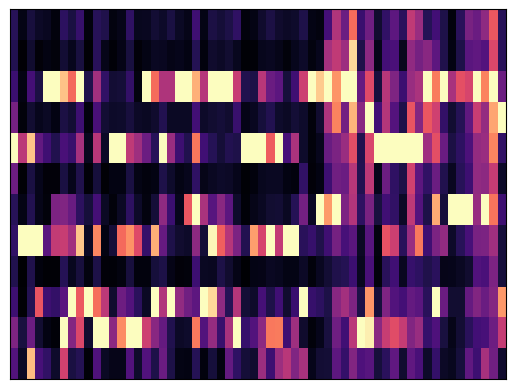

In [2]:
(data, target) = train_dataset.__getitem__(1288)
data = data.reshape((1, *data.shape))
target = target.reshape((1, *target.shape))
print(data.shape)
print(target.shape)
output = model(data)        
print(output.shape)
print()
# print(data)
# print(target)
train_dataset.specshow(index=1)